<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/3_desafio_frequencias_medidas/desafio_frequencias_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Frequências e Medidas

Fonte dos dados: [Kaggle](https://www.kaggle.com/code/shivamb/netflix-shows-and-movies-exploratory-analysis)

| Variável | Definição|
| - | - |
| show_id | id único do filme/série |
| title | título do filme/série |
| director | diretor |
| cast | elenco |
| country | país do filme/série|
| date_added | data que foi adicionado no Netflix |
| reading score| ano de lançamento original |
| rating | classificação |
| duration | duração total do filme/série |
| listed_in | categoria ou gênero |
| description | descrição do filme/série |
| type | tipo de filme/série |

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dado

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Estatística/netflix_titles_nov_2019.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


## Questões

### 1 - Exploração inicial

* Quantas linhas e colunas tem o dataset?
* Quais são os tipos das variáveis e se há valores ausentes?

In [3]:
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui 5837 linhas e 12 colunas.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


### 2 - Análises de frequência

* Qual a proporção de filmes vs séries no catálogo?
* Qual o gênero mais frequênte?

In [5]:
df.groupby('type').size()

,0
type,
Movie,3939
TV Show,1898


In [6]:
print(f"Há {df.groupby('type').size().iloc[0]} filmes e {df.groupby('type').size().iloc[1]} séries.")

Há 3939 filmes e 1898 séries.


In [7]:
df.groupby('listed_in').size().sort_values(ascending=False).head(5)

,0
listed_in,
Documentaries,297
Stand-Up Comedy,265
"Dramas, International Movies",238
"Dramas, Independent Movies, International Movies",170
"Comedies, Dramas, International Movies",157


In [8]:
print(f"O gênero mais frequente é {df.groupby('listed_in').size().sort_values(ascending=False).index[0]}.")

O gênero mais frequente é Documentaries.


### 3 - Análises estatísticas

* Qual a média, mediana e moda do tempo de duração dos filmes?
* Qual o filme mais curto e mais longo?

In [9]:
df.query('type == "Movie"')['duration'].unique()

array(['67 min', '135 min', '106 min', '107 min', '81 min', '118 min',
       '110 min', '104 min', '93 min', '94 min', '124 min', '137 min',
       '134 min', '69 min', '209 min', '86 min', '24 min', '46 min',
       '117 min', '87 min', '92 min', '114 min', '121 min', '109 min',
       '96 min', '97 min', '56 min', '119 min', '138 min', '111 min',
       '88 min', '73 min', '116 min', '85 min', '102 min', '101 min',
       '28 min', '103 min', '131 min', '166 min', '105 min', '82 min',
       '84 min', '112 min', '89 min', '136 min', '129 min', '158 min',
       '78 min', '100 min', '74 min', '60 min', '143 min', '98 min',
       '54 min', '59 min', '95 min', '61 min', '123 min', '44 min',
       '68 min', '99 min', '91 min', '40 min', '90 min', '108 min',
       '200 min', '133 min', '115 min', '55 min', '153 min', '185 min',
       '127 min', '120 min', '139 min', '122 min', '36 min', '141 min',
       '65 min', '126 min', '63 min', '14 min', '20 min', '52 min',
       '83 min', '6

In [10]:
df['movie_min'] = df.query('type == "Movie"')['duration'].str.replace(' min', '').astype(int)
df['movie_min'].sample(5)

,movie_min
1233,NaN
5092,NaN
838,NaN
4312,132.0
5222,NaN


In [11]:
df[['movie_min']].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).rename(index={'<lambda>': 'mode'})

,movie_min
mean,98.029195
median,97.000000
mode,90.000000


In [12]:
df[['show_id',	'title', 'movie_min']].agg(['min', 'max'])

,show_id,title,movie_min
min,269880,#Roxy,3.0
max,81227195,최강전사 미니특공대 : 영웅의 탄생,312.0


### 4 - Visualização de dados

* Criar um gráfico de barras para mostrar a quantidade de títulos por gênero.
* Criar um histograma para analisar a distribuição da duração dos filmes.

In [13]:
df_generos_populares = df.groupby('listed_in').size().sort_values(ascending=False).reset_index().head(20)
df_generos_populares

,listed_in,0
0,Documentaries,297
1,Stand-Up Comedy,265
2,"Dramas, International Movies",238
3,"Dramas, Independent Movies, International Movies",170
4,"Comedies, Dramas, International Movies",157
5,Kids' TV,153
6,"Documentaries, International Movies",147
7,Children & Family Movies,115
8,"Comedies, International Movies",113
9,"Children & Family Movies, Comedies",110


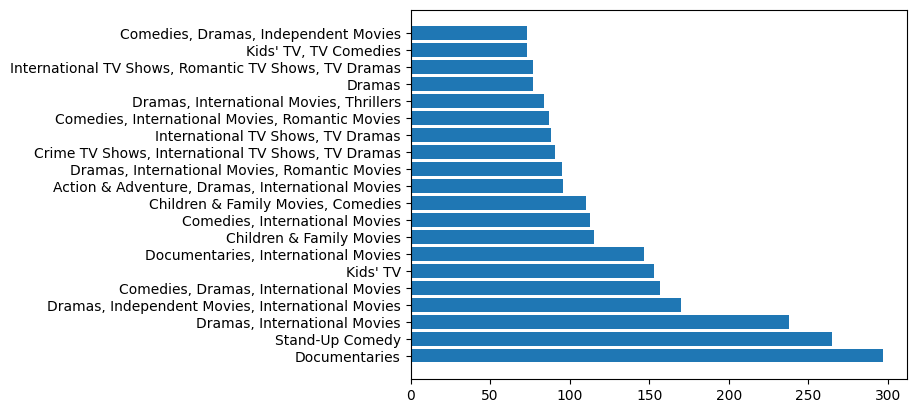

In [14]:
plt.barh(df_generos_populares['listed_in'], df_generos_populares[0]);

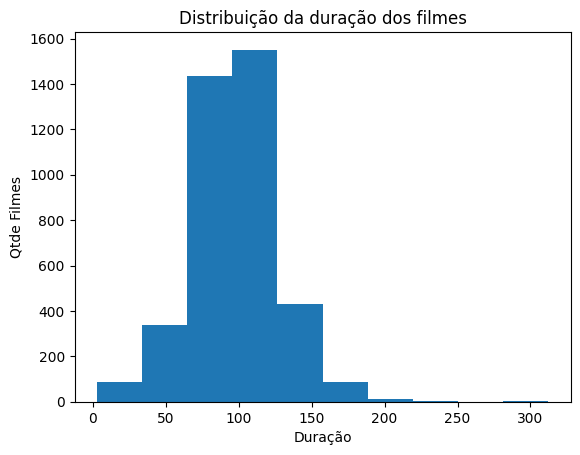

In [15]:
plt.hist(df['movie_min']);
plt.title('Distribuição da duração dos filmes')
plt.xlabel('Duração')
plt.ylabel('Qtde Filmes')
plt.show()

### Atividade extra

* Quais são os 5 países que possuem mais produções no catálogo?

In [16]:
df.groupby(df['country']).size().sort_values(ascending=False).head(5)

,0
country,
United States,1907
India,697
United Kingdom,336
Japan,168
Canada,139
